In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups (2).csv


In [ ]:
data=pd.read_csv("50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data1=data.rename({'R&D Spend':'RDSpend','Administration':'AdminSpend','Marketing Spend':'MarketSpend'},axis=1)
data1

,RDSpend,AdminSpend,MarketSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data1.describe()

,RDSpend,AdminSpend,MarketSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


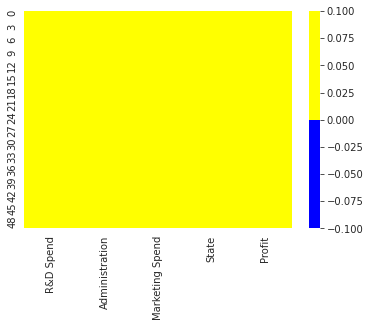

In [ ]:
import seaborn as sns
cols=data.columns
colours=['blue','yellow']
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

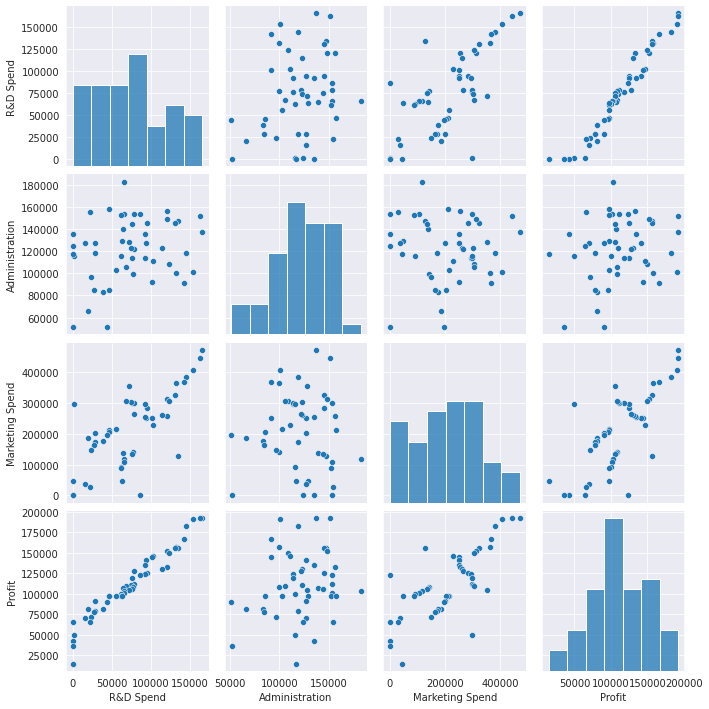

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [ ]:
data1.corr()

,RDSpend,AdminSpend,MarketSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
AdminSpend,0.241955,1.000000,-0.032154,0.200717
MarketSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
data1[data1.duplicated()]

,RDSpend,AdminSpend,MarketSpend,State,Profit


In [ ]:
model=smf.ols("Profit~RDSpend+AdminSpend+MarketSpend",data=data1).fit()

In [ ]:
model.params

Intercept      50122.192990
RDSpend            0.805715
AdminSpend        -0.026816
MarketSpend        0.027228
dtype: float64

In [ ]:
model.tvalues,model.pvalues

(Intercept       7.626218
 RDSpend        17.846374
 AdminSpend     -0.525507
 MarketSpend     1.655077
 dtype: float64, Intercept      1.057379e-09
 RDSpend        2.634968e-22
 AdminSpend     6.017551e-01
 MarketSpend    1.047168e-01
 dtype: float64)

In [ ]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [ ]:
slr_ad=smf.ols("Profit~AdminSpend",data=data1).fit()
slr_ad.tvalues,slr_ad.pvalues

(Intercept     3.040044
 AdminSpend    1.419493
 dtype: float64, Intercept     0.003824
 AdminSpend    0.162217
 dtype: float64)

In [ ]:
slr_mr=smf.ols("Profit~MarketSpend",data=data1).fit()
slr_mr.tvalues,slr_mr.pvalues

(Intercept      7.808356
 MarketSpend    7.802657
 dtype: float64, Intercept      4.294735e-10
 MarketSpend    4.381073e-10
 dtype: float64)

In [ ]:
mlr_admr=smf.ols("Profit~AdminSpend+MarketSpend",data=data1).fit()

In [ ]:
rsq_rd=smf.ols("RDSpend~AdminSpend+MarketSpend",data=data1).fit().rsquared
vif_rd=1/(1-rsq_rd)

In [ ]:
rsq_ad=smf.ols("AdminSpend~RDSpend+MarketSpend",data=data1).fit().rsquared
vif_ad=1/(1-rsq_ad)

In [ ]:
rsq_mr=smf.ols("MarketSpend~RDSpend+AdminSpend",data=data1).fit().rsquared
vif_mr=1/(1-rsq_mr)

In [ ]:
d1={'Variables':['RDSpend','AdminSpend','MarketSpend'],'Vif':[vif_rd,vif_ad,vif_mr]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDSpend,2.468903
1,AdminSpend,1.175091
2,MarketSpend,2.326773


In [ ]:
# no variable has VIF less than 20,so there is no collinearity

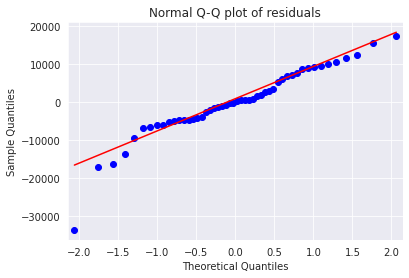

In [ ]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid<-30000))

[array([49])]

In [ ]:
def standard_values(vals):return(vals-vals.mean())/vals.std()

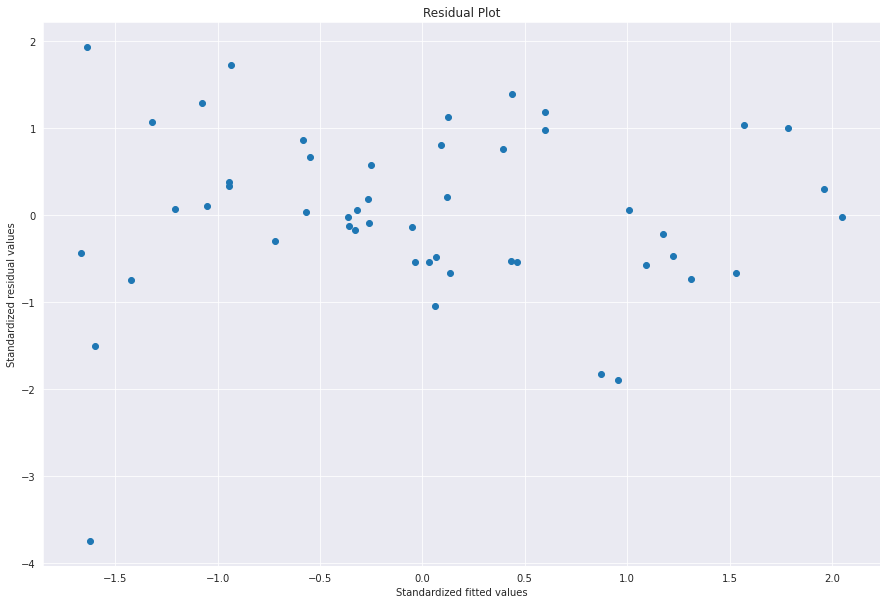

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

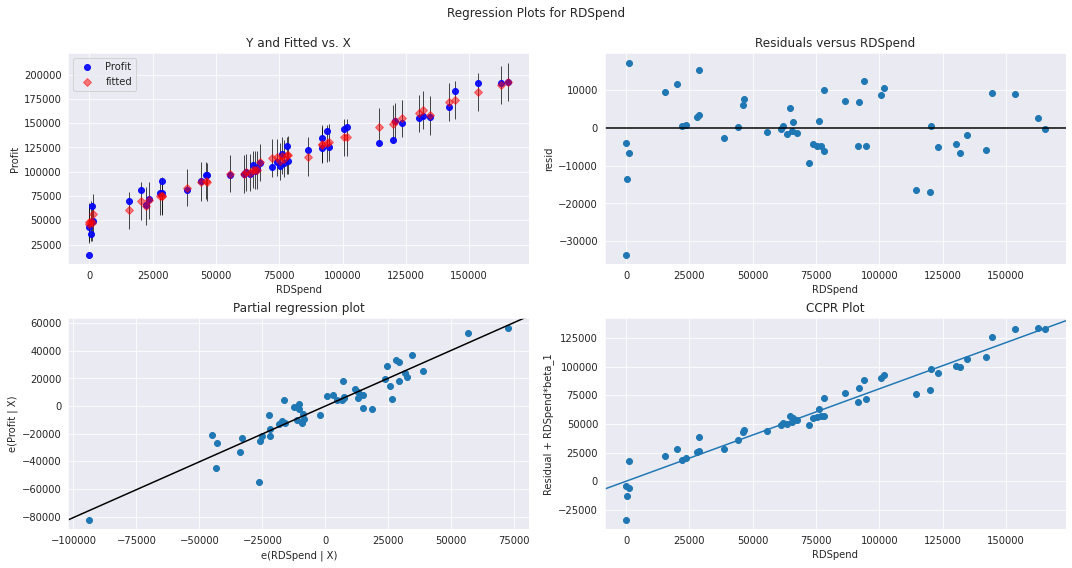

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDSpend',fig=fig)
plt.show()

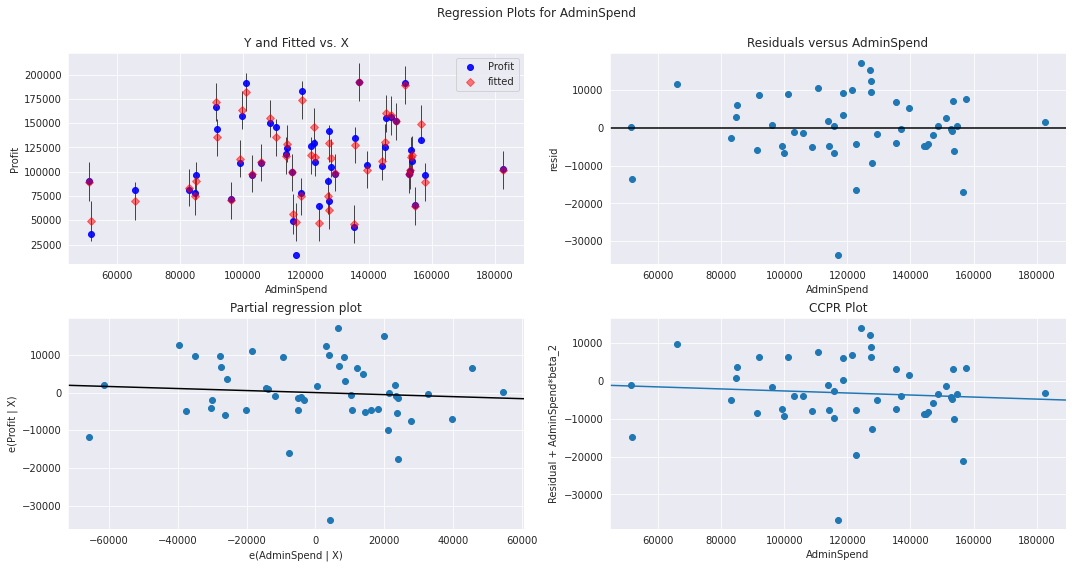

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AdminSpend',fig=fig)
plt.show()

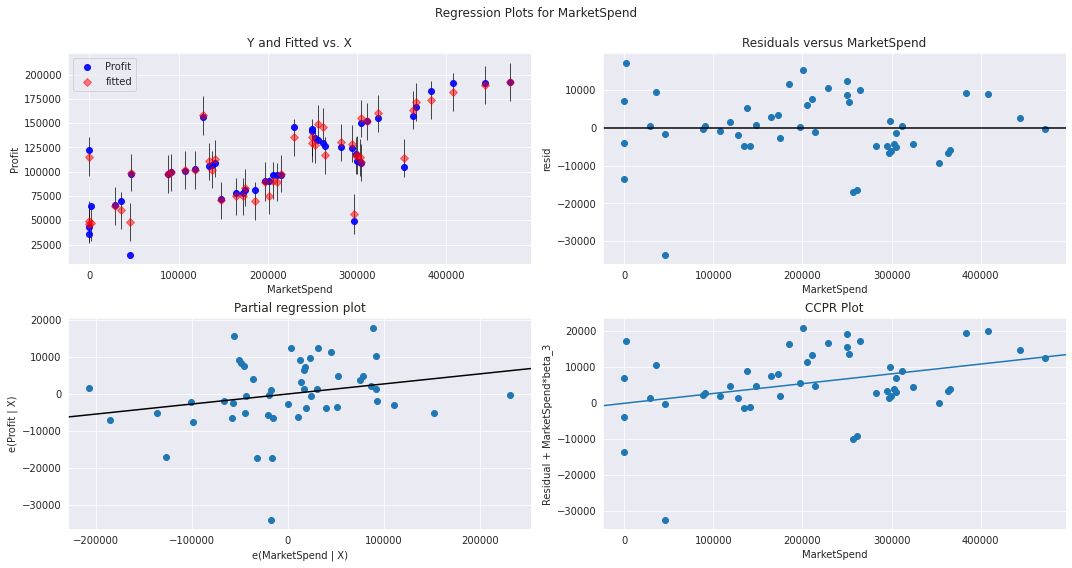

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MarketSpend',fig=fig)
plt.show()

In [ ]:
model_influence=model.get_influence()
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<ipython-input-43-474d987768ce>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data1)),np.round(c,5))


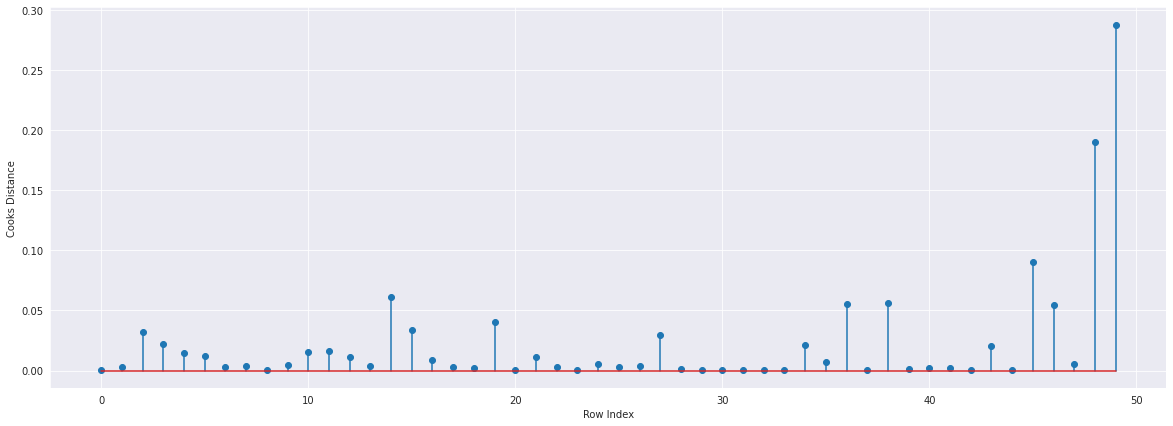

In [ ]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
np.argmax(c),np.max(c)

(49, 0.2880822927543272)

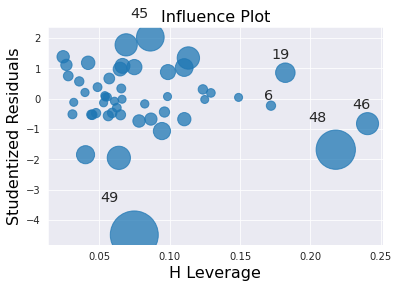

In [ ]:
influence_plot(model)
plt.show()

In [ ]:
data1.shape

(50, 5)

In [ ]:
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff=(3*(k+1))/n
leverage_cutoff

0.3673469387755102

In [ ]:
final_model=smf.ols("Profit~RDSpend+AdminSpend+MarketSpend",data=data1).fit()
final_model.rsquared,final_model.aic

(0.9613162435129848, 1020.5652974526366)

In [ ]:
final_model.rsquared

0.9613162435129848

In [ ]:
data1

,RDSpend,AdminSpend,MarketSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
new_data=pd.DataFrame({'RDSpend':70000,'AdminSpend':90000,'MarketSpend':140000},index=[0])
new_data

,RDSpend,AdminSpend,MarketSpend
0,70000,90000,140000


In [ ]:
pred_y=final_model.predict(data1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [ ]:
d1={'Prep_Models':['Model','Final Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d1)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final Model,0.961316


 Q2

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [ ]:
dataset=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
dataset

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
dataset0=pd.concat([dataset.iloc[:,2:4],dataset.iloc[:,6:7],dataset.iloc[:,8:9],dataset.iloc[:,12:14],dataset.iloc[:,15:18]],axis=1)
dataset0

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
dataset1=dataset0.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT','Weight':'WT'},axis=1)
dataset1

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
dataset1.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


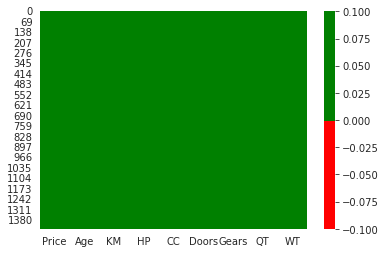

In [ ]:
import seaborn as sns
cols=dataset1.columns
colours=['Red','Green']
sns.heatmap(dataset1[cols].isnull(),
            cmap=sns.color_palette(colours))

In [ ]:
dataset1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
WT,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


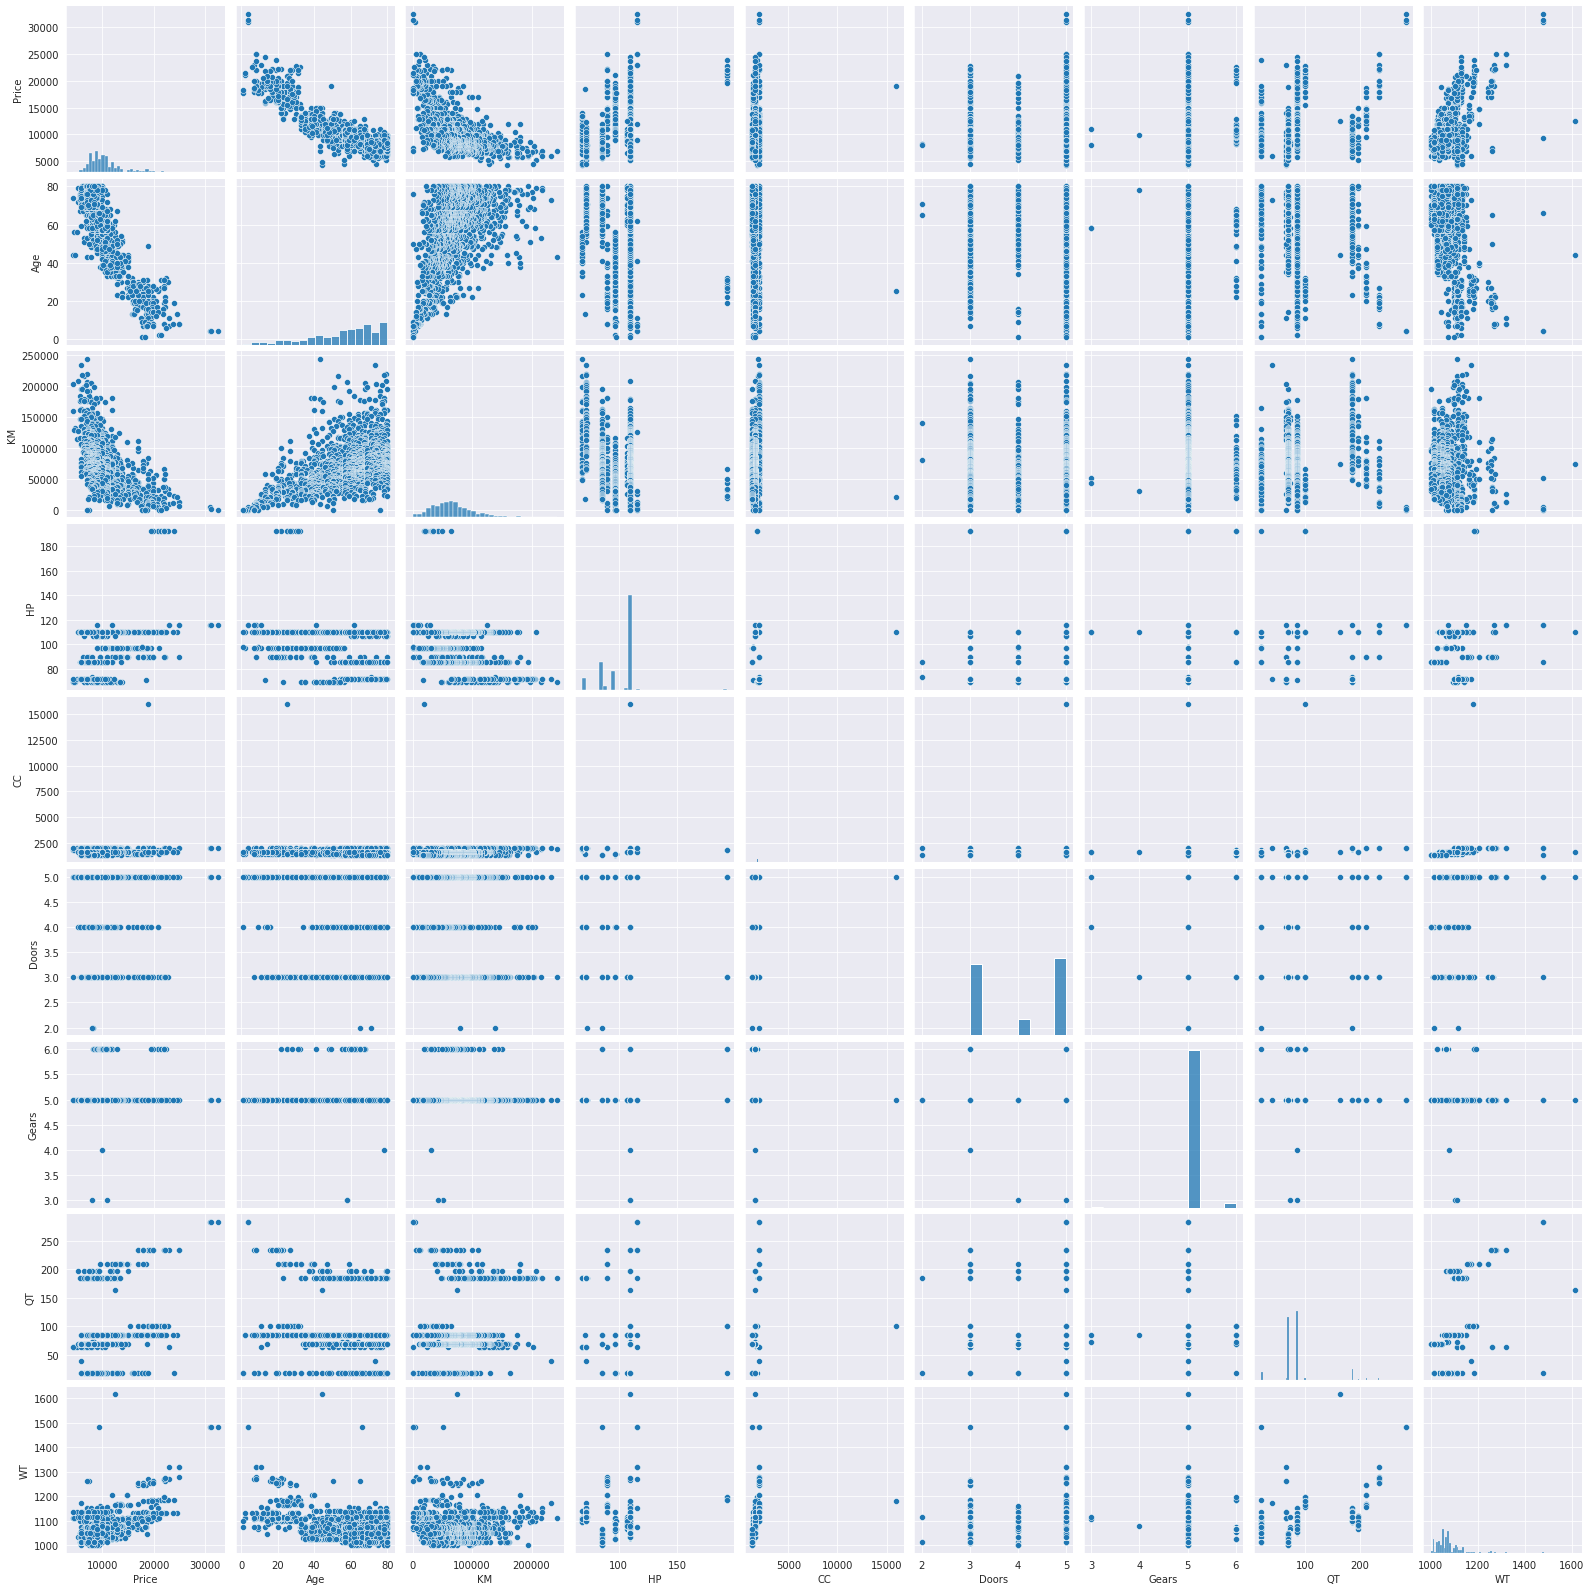

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(dataset1)

In [ ]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=dataset1).fit()

In [ ]:
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
WT             16.958632
dtype: float64

In [ ]:
model.tvalues,model.pvalues

(Intercept    -3.948666
 Age         -46.511852
 KM          -16.621622
 HP           11.241018
 CC           -1.344222
 Doors        -0.040410
 Gears         3.016007
 QT            3.014535
 WT           15.879803
 dtype: float64, Intercept     8.241949e-05
 Age          3.354724e-288
 KM            7.538439e-57
 HP            3.757218e-28
 CC            1.790902e-01
 Doors         9.677716e-01
 Gears         2.606549e-03
 QT            2.619148e-03
 WT            2.048576e-52
 dtype: float64)

In [ ]:
model.rsquared,model.rsquared_adj

(0.8637627463428191, 0.8629989775766962)

In [ ]:
slr_cc=smf.ols('Price~CC',data=dataset1).fit()
slr_cc.tvalues,slr_cc.pvalues

(Intercept    24.694090
 CC            4.824822
 dtype: float64, Intercept    1.766912e-112
 CC            1.550808e-06
 dtype: float64)

In [ ]:
slr_d=smf.ols('Price~Doors',data=dataset1).fit()
slr_d.tvalues,slr_d.pvalues

(Intercept    19.258097
 Doors         7.141657
 dtype: float64, Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64)

In [ ]:
mlr_ccd=smf.ols('Price~CC+Doors',data=dataset1).fit()
mlr_ccd.tvalues,mlr_ccd.pvalues

(Intercept    12.620704
 CC            4.340400
 Doors         6.816153
 dtype: float64, Intercept    1.056885e-34
 CC           1.521992e-05
 Doors        1.373469e-11
 dtype: float64)

In [ ]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+WT',data=dataset1).fit().rsquared
vif_age=1/(1-rsq_age)

In [ ]:
rsq_km=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+WT',data=dataset1).fit().rsquared
vif_km=1/(1-rsq_km)

In [ ]:
rsq_hp=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+WT',data=dataset1).fit().rsquared
vif_hp=1/(1-rsq_hp)

In [ ]:
rsq_cc=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+WT',data=dataset1).fit().rsquared
vif_cc=1/(1-rsq_cc)

In [ ]:
rsq_dr=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+WT',data=dataset1).fit().rsquared
vif_dr=1/(1-rsq_dr)

In [ ]:
rsq_gr=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+WT',data=dataset1).fit().rsquared
vif_gr=1/(1-rsq_gr)

In [ ]:
rsq_qt=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+WT',data=dataset1).fit().rsquared
vif_qt=1/(1-rsq_qt)

In [ ]:
rsq_wt=smf.ols('WT~Age+KM+HP+CC+Doors+Gears+QT',data=dataset1).fit().rsquared
vif_wt=1/(1-rsq_wt)

In [ ]:
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','WT'],
    'Vif':[vif_age,vif_km,vif_hp,vif_cc,vif_dr,vif_gr,vif_qt,vif_wt]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.884620
1,KM,1.419422
2,HP,1.419422
3,CC,1.156575
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,WT,2.516420


In [ ]:
# No variable has VIF less than 20,so no collinearity

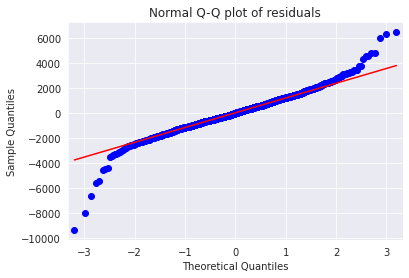

In [ ]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>6000))

[array([147, 523])]

In [ ]:
list(np.where(model.resid<-6000))

[array([221, 601, 960])]

In [ ]:
def standard_values(vals):return(vals-vals.mean())/vals.std()

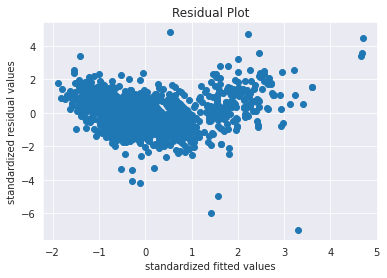

In [ ]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

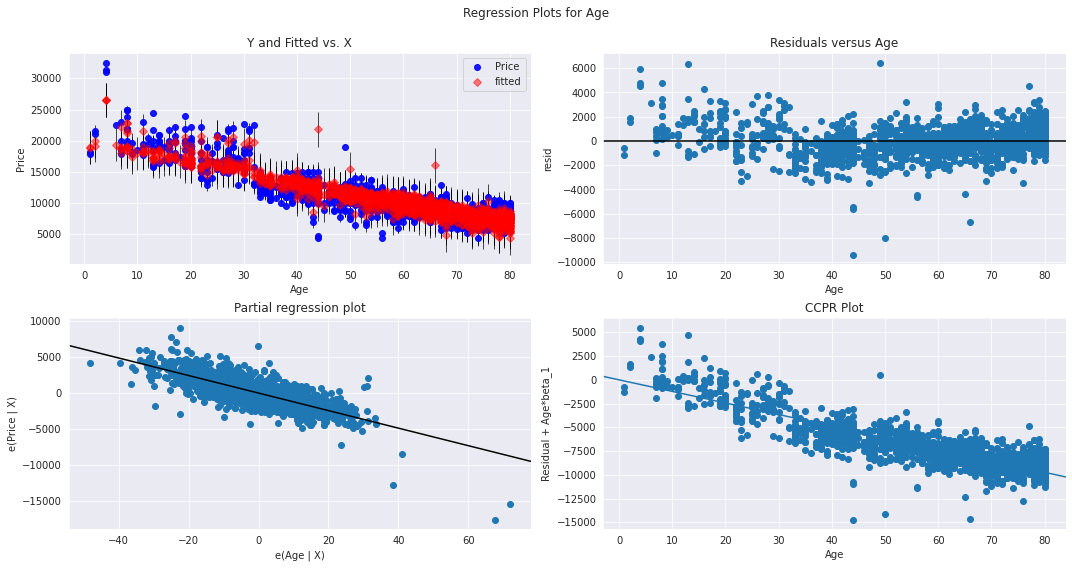

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

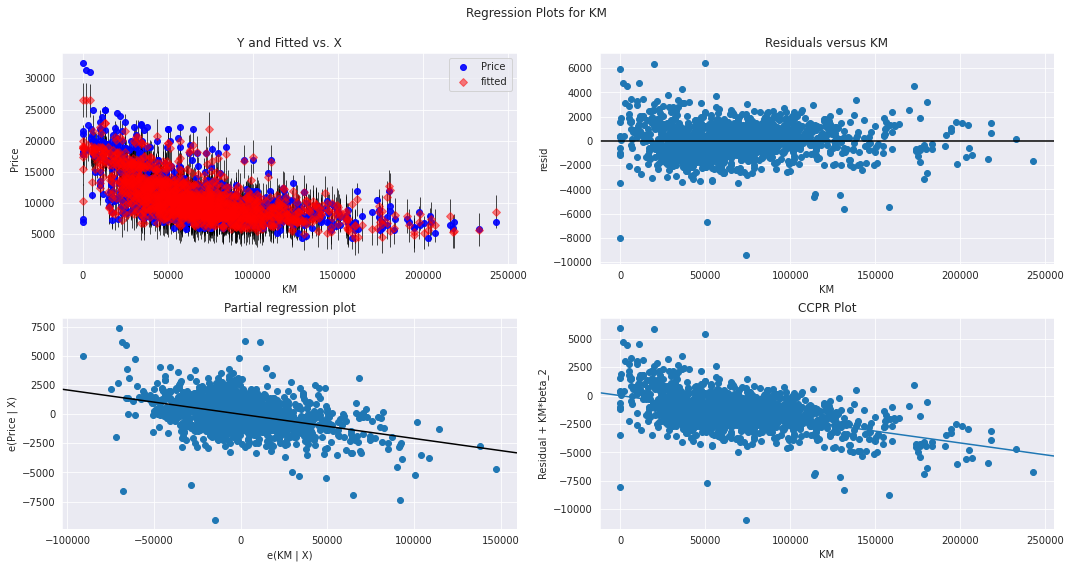

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

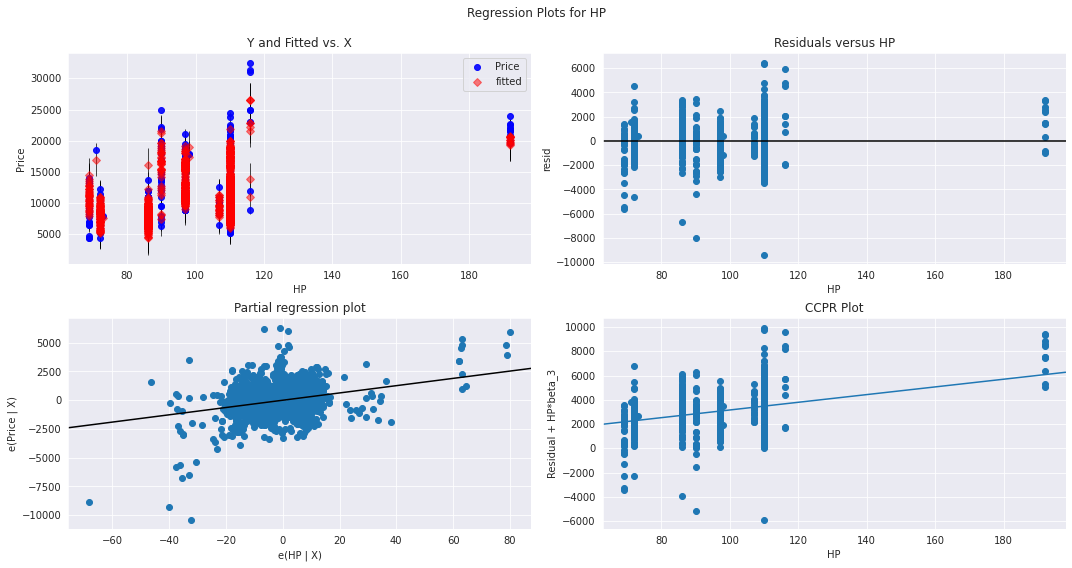

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

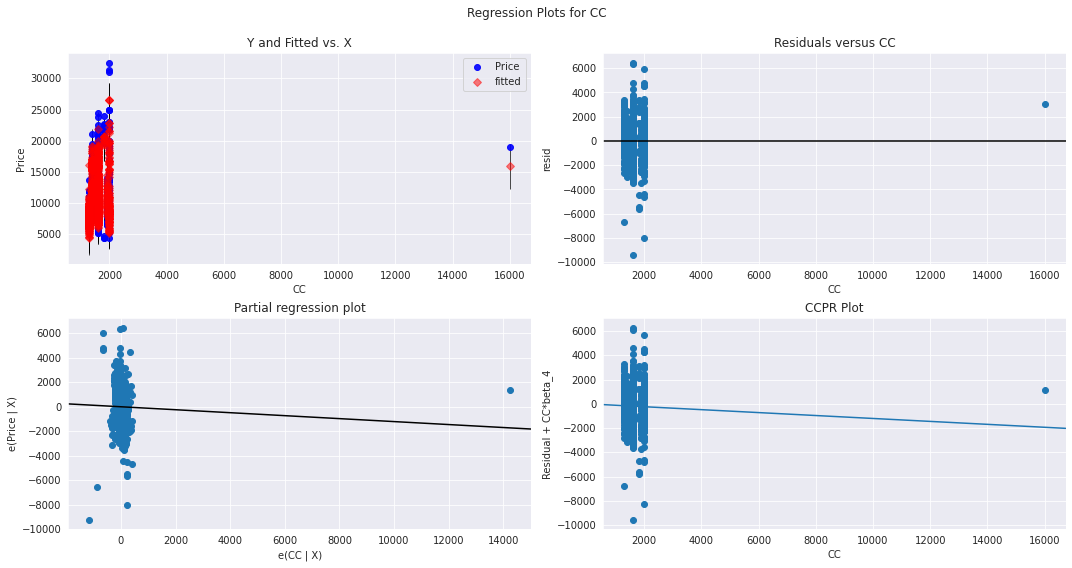

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

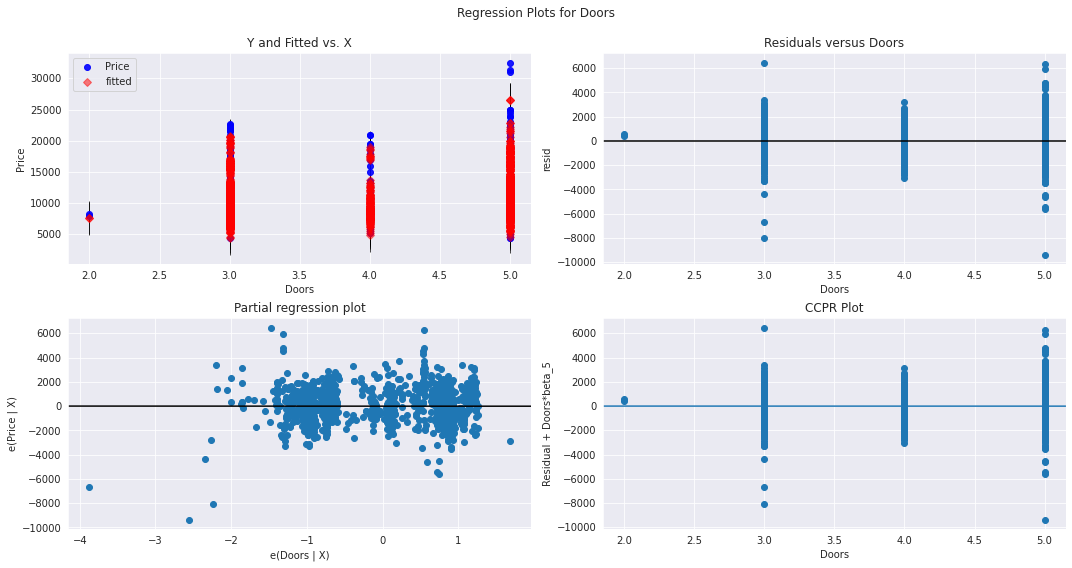

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

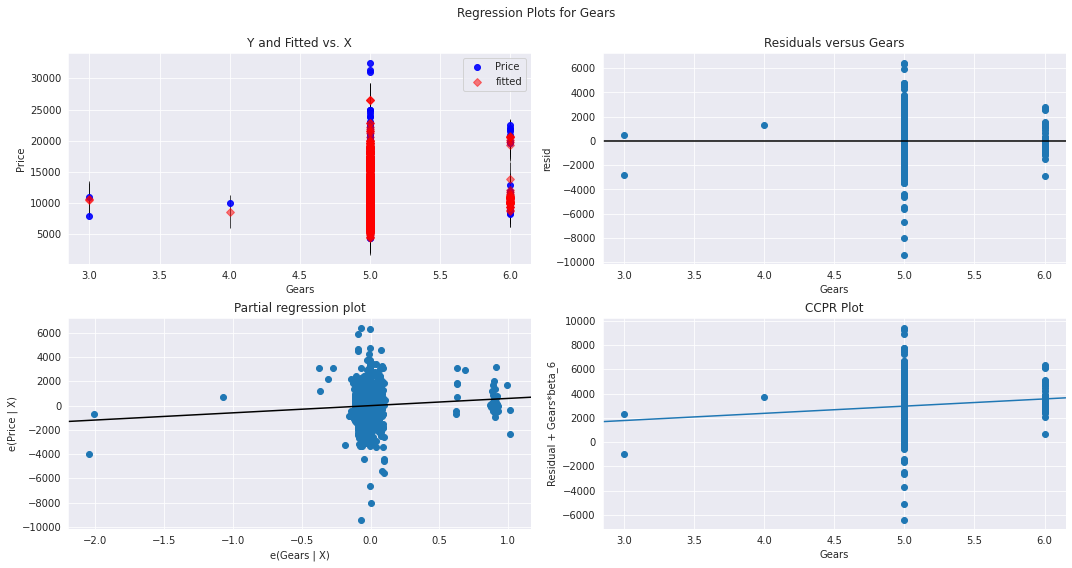

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

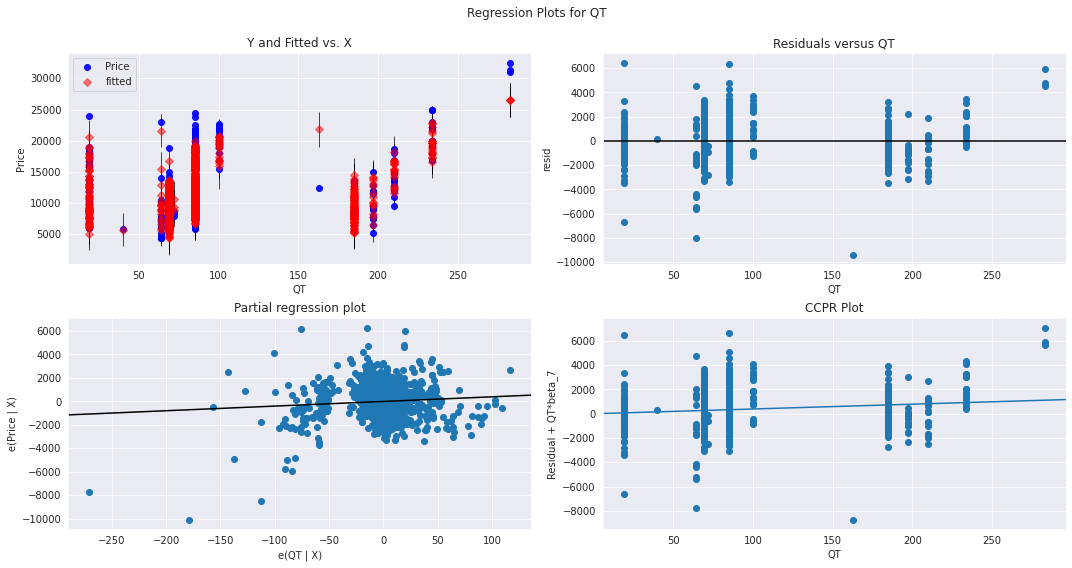

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

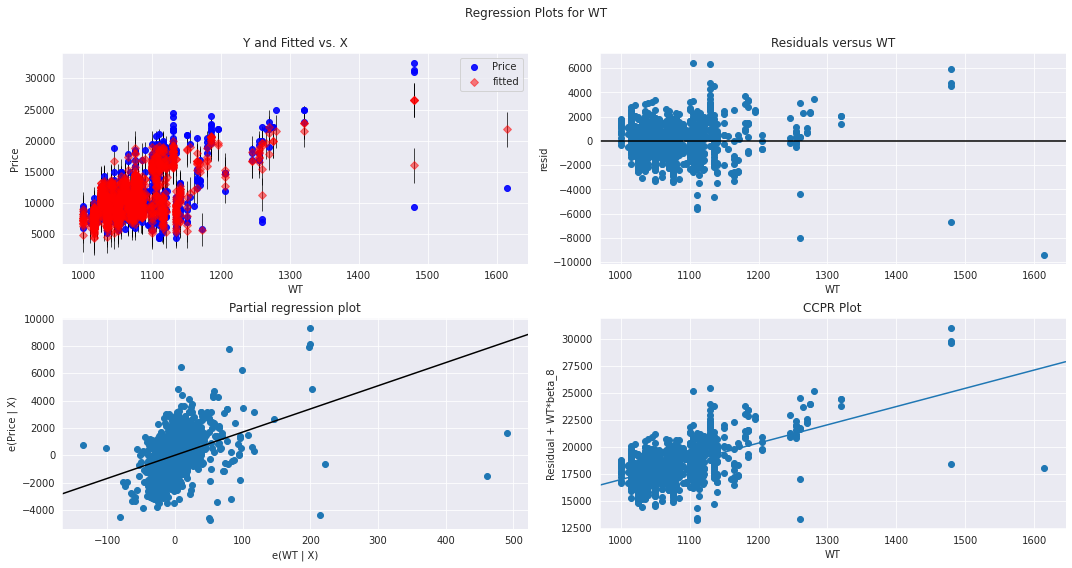

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'WT',fig=fig)
plt.show()

In [ ]:
(c,_)=model.get_influence().cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

<ipython-input-113-5021fe43c65c>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(dataset1)),np.round(c,3))


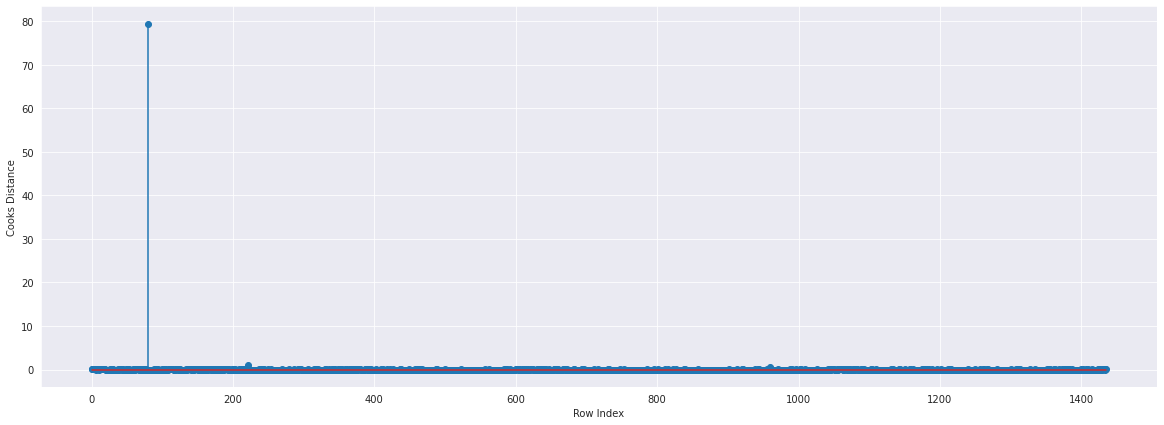

In [ ]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(dataset1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
np.argmax(c),np.max(c)

(80, 79.52010624141955)

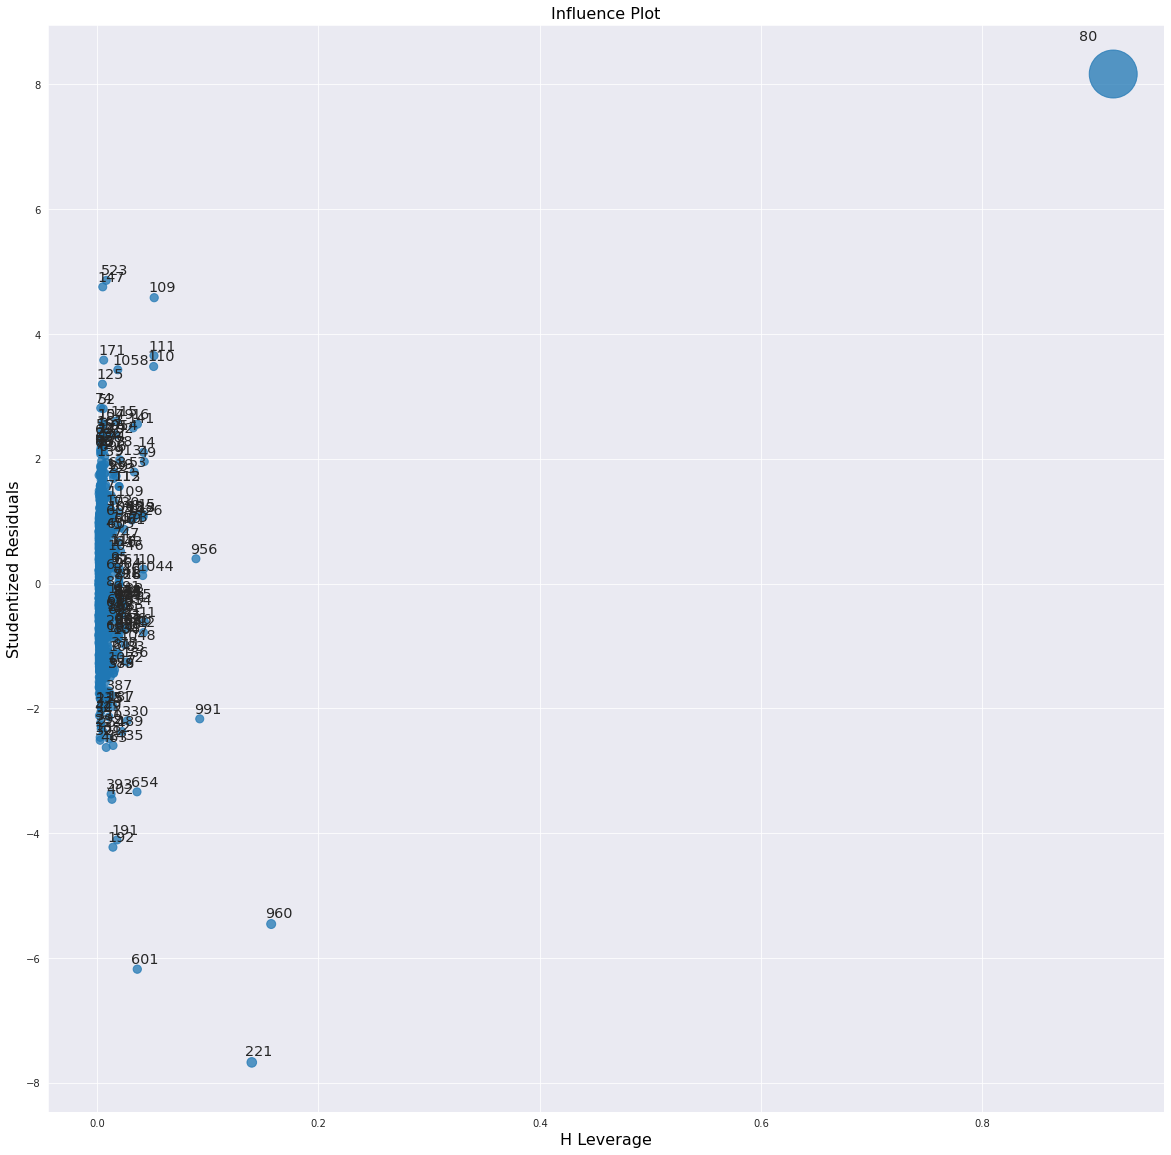

In [ ]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax=ax)

In [ ]:
k=dataset1.shape[1]
k=dataset1.shape[0]
leverage_cutoff=(3*(k+1))/n
leverage_cutoff

87.9795918367347

In [ ]:
dataset1[dataset1.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
80,18950,25,20019,110,16000,5,5,100,1180


In [ ]:
data_new=dataset1.copy()
data_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
dataset2=data_new.drop(data_new.index[[80]],axis=0).reset_index(drop=True)
dataset2

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=dataset2).fit()
final_model.rsquared,final_model.aic

(0.8693790488655819, 24687.28102432684)

In [ ]:
final_model.rsquared

0.8693790488655819

In [ ]:
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"WT":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,WT
0,12,40000,80,1300,4,5,69,1012


In [ ]:
final_model.predict(new_data)

0    14964.403777
dtype: float64

In [ ]:
pred_y=final_model.predict(dataset2)
pred_y

0       16528.990607
1       16065.803813
2       16502.686471
3       16149.527067
4       15938.095051
            ...     
1430     8971.183912
1431     8435.722285
1432     8591.588786
1433     8713.828687
1434     9969.788925
Length: 1435, dtype: float64